## Q1

In [9]:
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
import seaborn as sns
import random

In [10]:
# Base Class
class Layer:
    def __init__(self):
        self.input = None
        self.output = None
    
    def forward(self, input):
        raise NotImplementedError
    
    def backward(self, input, grad_output):
        raise NotImplementedError

In [11]:
# Matrix Multiplication Layer
class Dense(Layer):
    def __init__(self, input_size, output_size):
        self.W = np.random.randn(output_size, input_size)
        self.b = np.random.randn(output_size, 1)

    def forward(self, input):
        self.input = input
        self.output = np.dot(self.W, self.input) + self.b
        return self.output
    
    def backward(self, output_grad, learning_rate):
        weights_gradient = np.dot(output_grad, self.input.T)
        input_graient = np.dot(self.W.T, output_grad)
        self.W -= learning_rate * weights_gradient
        self.b -= learning_rate * output_grad
        return input_graient

In [12]:
# Activation Layer
class Activation(Layer):
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime
    
    def forward(self, input):
        self.input = input
        self.output = self.activation(self.input)
        return self.output
    
    def backward(self, output_grad, learning_rate):
        return np.multiply(output_grad, self.activation_prime(self.input))

In [13]:
# Softmax Layer
class Softmax(Layer):
    def forward(self, input):
        temp = np.exp(input)
        self.output = temp / np.sum(temp, axis=0)
        return self.output
    
    def backward(self, output_grad, learning_rate):
        n = np.size(self.output)
        return np.dot((np.identity(n) - self.output.T) * self.output, output_grad)

In [14]:
# Sigmoid Layer
class Sigmoid(Activation):
    def __init__(self):
        def sigmoid(x):
            return 1 / (1 + np.exp(-x))
        def sigmoid_prime(x):
            return sigmoid(x) * (1 - sigmoid(x))
        super().__init__(sigmoid, sigmoid_prime)

In [15]:
# Linear Activation
class Linear(Activation):
    def __init__(self):
        def linear(x):
            return x
        def linear_prime(x):
            return np.ones(x.shape)
        super().__init__(linear, linear_prime)

In [16]:
# tanh Activation
class Tanh(Activation):
    def __init__(self):
        def tanh(x):
            return np.tanh(x)
        def tanh_prime(x):
            return 1 - np.tanh(x) ** 2
        super().__init__(tanh, tanh_prime)

In [17]:
# Mean Squared Error
def mse(y, y_hat):
    return np.mean(np.power(y - y_hat, 2))

# Mean Squared Error Derivative
def mse_prime(y, y_hat):
    return 2 * (y_hat - y) / np.size(y)

# Cross Entropy Loss
def cross_entropy(y_true, y_pred):
    loss = -np.log(y_pred[y_true][0])
    return loss[0][0]

# Cross Entropy Loss Derivative
def cross_entropy_prime(y, y_hat):
    one_hot = np.zeros(y_hat.shape)
    one_hot[y[0][0]][0] = 1
    grad = y_hat - one_hot
    return grad

def tanh(x):
    return np.tanh(x)

def tanh_prime(x):
    return 1 - np.tanh(x) ** 2

## Q2

In [ ]:
# Load the dataset
house_data = datasets.load_boston()

In [19]:
# Min max normalization
Y = house_data.target
X = (house_data.data - house_data.data.min()) / (house_data.data.max() - house_data.data.min())

In [20]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

In [21]:
# Prediction Function
def predict(network, input):
    output = input
    for layer in network:
        output = layer.forward(output)
        # print(output)
    return output

In [22]:
# Training our network
def train(network, X, Y, learning_rate=0.01, epochs=1000):
    err = []
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))

    for epoch in range(epochs):
        error = 0
        for x, y in zip(X, Y):
            output = predict(network, x)
            error += mse(y, output)
            output_grad = mse_prime(y, output)
            for layer in reversed(network):
                output_grad = layer.backward(output_grad, learning_rate)

        if epoch % 100 == 0:
            print('Epoch:', epoch, 'Error:', error)
            err.append(error)
    plt.plot(err)
    plt.show()

In [23]:
# Create the network
network = [Dense(13, 16), Sigmoid(), Dense(16, 1), Linear()]

Epoch: 0 Error: 36529.161632979085
Epoch: 100 Error: 24055.97452812567
Epoch: 200 Error: 20864.52273160473
Epoch: 300 Error: 17817.188165881646
Epoch: 400 Error: 15877.546698460255
Epoch: 500 Error: 14572.290170105005
Epoch: 600 Error: 13592.768802468452
Epoch: 700 Error: 12827.262250519536
Epoch: 800 Error: 12217.972809938537
Epoch: 900 Error: 11723.400168220665


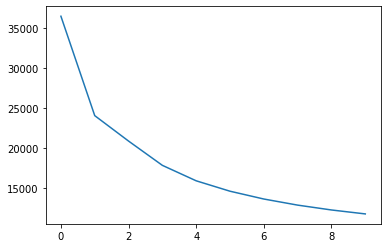

In [24]:
random.seed(5)
train(network, x_train, y_train)

In [25]:
y_pred = predict(network, x_test.T)
y_pred

array([[39.75126797, 37.92619455, 27.5645028 ,  8.74945038, 33.15172216,
         8.74051975, 30.62372545, 29.40232532, 26.26737021, 20.82768541,
        31.3925607 , 26.22223197, 25.11009868, 36.50795204, 31.86605665,
        21.12870404,  6.06281452, 22.42783848, 16.32977088, 15.11803133,
        11.31095001, 21.66840239, 37.47079199, 24.08097349, 30.34726536,
        13.34910313, 28.08775792, 23.22334733, 30.70497173, 29.10373142,
        19.48713183, 12.26383261, 16.75037593, 18.6457661 , 26.92684135,
        20.35858727, 28.02309961, 12.15750943, 39.53234293, 39.15171558,
        19.04546481, 12.01021928, 31.66687046, 14.70980889, 26.92080109,
        31.72909872,  4.94846468, 22.24731473, 21.596439  , 14.7441162 ,
        20.70339845, 20.7556402 , 24.58315316, 17.14015175, 20.26146084,
        30.49255893, 33.15489141, 15.14012488, 27.47921141, 22.86352736,
        20.65105177, 25.68447657, 17.07165053, 35.05889705, 24.61578337,
        12.28421023, 22.09018305, 26.96682204, 22.8

In [26]:
y_test

array([37.6, 27.9, 22.6, 13.8, 35.2, 10.4, 23.9, 29. , 22.8, 23.2, 33.2,
       19. , 20.3, 36.1, 24.4, 17.2, 17.9, 19.6, 19.7, 15. ,  8.1, 23. ,
       44.8, 23.1, 32.2, 10.8, 23.1, 21.2, 22.2, 24.1, 17.3,  7. , 12.7,
       17.8, 26.4, 19.6, 25.1,  8.3, 48.8, 34.9, 13.8, 14.4, 30.1, 12.7,
       27.1, 24.8,  7. , 20.5, 21.5, 14. , 20.4, 22.2, 21.4, 13.5, 19.4,
       24.7, 43.8, 14.1, 28.6, 19.7, 16.8, 23.2, 16.2, 41.3, 22.7,  8.3,
       18.4, 24.7, 21.7, 20.6, 16.7, 22.1, 19.4, 27.5, 27.9, 30.1, 17.4,
       15.4, 31. , 14.2, 19.6, 50. , 21.7, 11.7, 19.4, 13. , 17.5,  9.7,
       20.3, 18.6, 50. , 19.6, 21.4, 18.4, 22.6, 25. , 15.6, 26.6, 22.4,
       13.1, 23. , 24.5])

In [27]:
print(mse(y_test, y_pred))

24.778611905811253


## Q3

In [28]:
# Load the dataset
iris_data = datasets.load_iris()

In [29]:
# Min Max Normalization
x = (iris_data.data - iris_data.data.min()) / (iris_data.data.max() - iris_data.data.min())
y = iris_data.target

In [30]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=5)

In [31]:
# Create the network
network = [Dense(x.shape[1], 6), Sigmoid(), Dense(6, 3), Softmax()]

In [32]:

def train(network, X, Y, epochs=1000, learning_rate=0.05):
    err=[]
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))
    Y = np.reshape(Y, (Y.shape[0], 1, 1))

    for i in range(epochs):
        error=0
        for x, y in zip(X, Y):
            output = predict(network, x)
            error += cross_entropy(y, output)
            output_grad = cross_entropy_prime(y, output)
            for layer in reversed(network):
                output_grad = layer.backward(output_grad, learning_rate)
        if i % 100 == 0:
            print('Epoch:', i, 'Error:', error)
            err.append(error)
    plt.plot(err)
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.title('Error vs Epochs')
    plt.show()
    

Epoch: 0 Error: 294.1657179868821
Epoch: 100 Error: 43.06801790293201
Epoch: 200 Error: 22.155378285561646
Epoch: 300 Error: 15.619068801125334
Epoch: 400 Error: 12.597650720893608
Epoch: 500 Error: 10.88209178440507
Epoch: 600 Error: 9.777700185607072
Epoch: 700 Error: 9.003476621888668
Epoch: 800 Error: 8.427159428359701
Epoch: 900 Error: 7.979104152568257


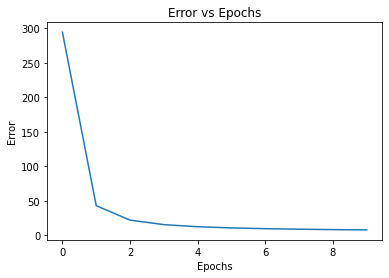

In [33]:
random.seed(6)
train(network, x_train, y_train)

In [34]:
y_pred = predict(network, x_test.T)

In [35]:
y_test

array([1, 2, 2, 0, 2, 1, 0, 1, 0, 1, 1, 2, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2,
       0, 1, 1, 2, 1, 1, 1, 2])

In [36]:
# Final prediction
y_hat = np.zeros(y_pred.shape[1])
for i in range(y_pred.shape[1]):
    temp = max(y_pred[0][i], y_pred[1][i], y_pred[2][i])
    if y_pred[0][i] == temp:
        y_hat[i] = 0
    elif y_pred[1][i] == temp:
        y_hat[i] = 1
    elif y_pred[2][i] == temp:
        y_hat[i] = 2

y_hat

array([1., 2., 2., 0., 2., 1., 0., 2., 0., 1., 1., 2., 2., 2., 0., 0., 2.,
       2., 0., 0., 1., 2., 0., 1., 1., 2., 1., 1., 1., 2.])

## Q4

In [37]:
# Neural Network Class
class NeuralNetwork():
    def __init__(self, network, loss_fn, loss_fn_prime, epochs, learning_rate):
        self.network = network
        self.loss_fn = loss_fn
        self.loss_fn_prime = loss_fn_prime
        self.epochs = epochs
        self.learning_rate = learning_rate
    
    def train(self, X, Y):
        X = np.reshape(X, (X.shape[0], X.shape[1], 1))
        Y = np.reshape(Y, (Y.shape[0], 1, 1))
        err = []
        for epoch in range(self.epochs):
            error = 0
            for x, y in zip(X, Y):
                output = predict(self.network, x)
                error += self.loss_fn(y, output)
                output_grad = self.loss_fn_prime(y, output)
                for layer in reversed(self.network):
                    output_grad = layer.backward(output_grad, self.learning_rate)
                    
            if epoch % 100 == 0:
                print('Epoch:', epoch, 'Error:', error)
                err.append(error)
        plt.plot(err)
        plt.show()

## Q5

In [38]:
# Loading and preprocessing the data
x = (house_data.data - house_data.data.min()) / (house_data.data.max() - house_data.data.min())
y = house_data.target

Epoch: 0 Error: 38958.10590157451
Epoch: 100 Error: 25996.93066345243
Epoch: 200 Error: 24735.775121270406
Epoch: 300 Error: 23718.17188207913
Epoch: 400 Error: 22831.646913850887
Epoch: 500 Error: 22047.182825007912
Epoch: 600 Error: 21349.75694012565
Epoch: 700 Error: 20728.379527886336
Epoch: 800 Error: 20173.947573377016
Epoch: 900 Error: 19678.619578253205


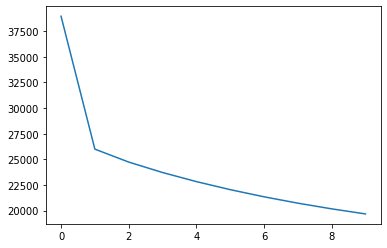

In [39]:
# training model with single layer
random.seed(7)
network_1 = [Dense(13, 1), Linear()]
nn_1 = NeuralNetwork(network_1, mse, mse_prime, 1000, 0.01)
nn_1.train(x, y)

Epoch: 0 Error: 25546.984229949274
Epoch: 100 Error: 20213.975528186696
Epoch: 200 Error: 15043.182194367986
Epoch: 300 Error: 12762.65403068425
Epoch: 400 Error: 11565.696185111985
Epoch: 500 Error: 10833.549848696066
Epoch: 600 Error: 10610.410273091256
Epoch: 700 Error: 10335.947624611348
Epoch: 800 Error: 10152.7809748921
Epoch: 900 Error: 9833.566663825806


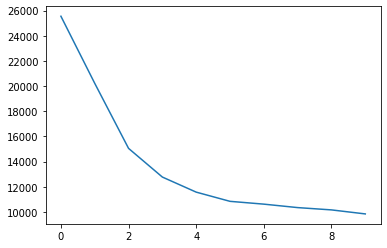

In [40]:
# training model with 2 layers
random.seed(8)
network_2 = [Dense(13, 13), Sigmoid(), Dense(13, 1), Linear()]
nn_2 = NeuralNetwork(network_2, mse, mse_prime, 1000, 0.01)
nn_2.train(x, y)

Epoch: 0 Error: 54509.41565189041
Epoch: 100 Error: 23198.24862629505
Epoch: 200 Error: 17391.742226226328
Epoch: 300 Error: 13403.958226762785
Epoch: 400 Error: 11450.02900105469
Epoch: 500 Error: 10473.708129179044
Epoch: 600 Error: 9974.348820452096
Epoch: 700 Error: 9558.154608749926
Epoch: 800 Error: 9229.917802100137
Epoch: 900 Error: 8957.49886248387


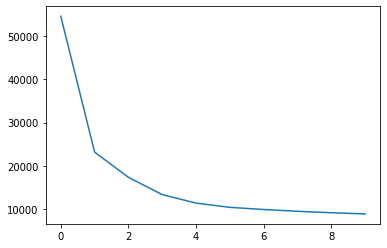

In [41]:
# Training model with 3 layers
random.seed(4)
network_3 = [Dense(13, 13), Sigmoid(), Dense(13, 13), Sigmoid(), Dense(13, 1), Linear()]
nn_3 = NeuralNetwork(network_3, mse, mse_prime, 1000, 0.001)
nn_3.train(x, y)

## Q6

In [42]:
# Load the dataset
mnist_data = datasets.load_digits()

In [43]:
# Min Max Normalization
x = (mnist_data.data - mnist_data.data.min()) / (mnist_data.data.max() - mnist_data.data.min())
y = mnist_data.target

Epoch: 0 Error: 36664.91282445053
Epoch: 100 Error: 36607.61151052424
Epoch: 200 Error: 36607.4029949875
Epoch: 300 Error: 36589.605711954115


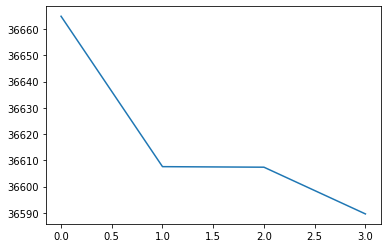

In [44]:
# Training Neural Network with sigmoid activation and mse
random.seed(6)
network_4 = [Dense(x.shape[1], 89), Tanh(), Dense(89, 10), Sigmoid()]
nn_4 = NeuralNetwork(network_4, mse, mse_prime, 301, 0.1)
nn_4.train(x, y)

Epoch: 0 Error: 15216.538373008942
Epoch: 100 Error: 103.80915545896326
Epoch: 200 Error: 67.08674220909111
Epoch: 300 Error: 59.92341205981761


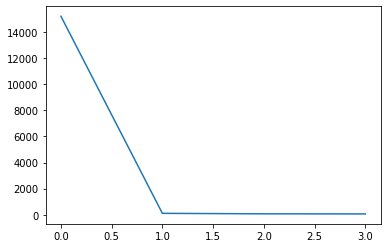

In [45]:
# Training Neural Network with linear activation and cross entropy
random.seed(8)
network_5 = [Dense(x.shape[1], 89), Tanh(), Dense(89, 10), Linear(), Softmax()]
nn_5 = NeuralNetwork(network_5, cross_entropy, cross_entropy_prime, 301, 0.01)
nn_5.train(x, y)

## Q7

In [48]:
def Conv2D(image, filter, padding=0, strides=1):
    '''
    2D Convolution
    '''
    # Shapes of filter and image
    x_filt = filter.shape[0]
    y_filt = filter.shape[1]
    x_img = image.shape[0]
    y_img = image.shape[1]

    # Shape of Convolved Image
    x_out = int(((x_img - x_filt + 2 * padding) / strides) + 1)
    y_out = int(((y_img - y_filt + 2 * padding) / strides) + 1)
    output = np.zeros((x_out, y_out))

    # Padding
    if padding == 0:
        pad_image = image
    else:
        pad_image = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        pad_image[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image

    # Iteration through the image
    for y in range(image.shape[1]):
        if y > image.shape[1] - y_filt:
            break
        if y % strides == 0:
            for x in range(image.shape[0]):
                if x > image.shape[0] - x_filt:
                    break
                try:
                    if x % strides == 0:
                        output[x, y] = (filter * pad_image[x: x + x_filt, y: y + y_filt]).sum()
                except:
                    break

    return output

In [49]:
class CNN_layer:
    def __init__(self, filter_size=3):
        self.filter = np.random.rand(filter_size, filter_size)
        self.bias = np.random.randn(1)
    
    def forward(self, image, padding=0, strides=1):
        self.input = image
        self.output = Conv2D(image=self.input, filter=self.filter, padding=padding, strides=strides)
        self.output += self.bias
        return self.output
    
    def backward(self, d_prev):
        self.d_filter = np.zeros(self.filter.shape)
        self.dbias = np.zeros(1)
        for i in range(0, d_prev.shape[0]):
            for j in range(0, d_prev.shape[1]):
                for k in range(0, d_prev.shape[2]):
                    for l in range(0, d_prev.shape[3]):
                        self.d_filter[i, j] += d_prev[i, j, k, l] * image[i+k, j+l]
                        self.dbias += d_prev[i, j, k, l]
        return self.d_filter, self.dbias

## Q8

In [63]:
class CNN_generalized(Layer):
    def __init__(self, nc_input=3, nc_output=2, filter_size=3):
        self.nc_input = nc_input
        self.nc_output = nc_output
        self.filter = np.random.rand(self.nc_output, self.nc_input, filter_size, filter_size)
        self.bias = np.random.randn(self.nc_output)
    
    def forward(self, image):

        self.input = image.reshape(self.nc_input, image.shape[-2], image.shape[-1])
        
        output_channels = []

        for i in self.filter:
            output_channel = np.array([[[0]]], dtype="float64")
            for j in range(self.nc_input):
                output_channel = output_channel + np.array([Conv2D(image=self.input[j], filter=filter) for filter in i])
            output_channels.append(output_channel)
        
        self.output = np.array(output_channels)

        return self.output.flatten()

    def backward(self, output_gradient, learning_rate):
        filters_gradient = np.zeros(self.filters_shape)
        input_gradient = np.zeros(self.input_shape)

        for i in range(self.nc_output):
            for j in range(self.nc_input):
                filters_gradient[i, j] = signal.correlate2d(self.input[j], output_gradient[i], "valid")
                input_gradient[j] += signal.convolve2d(output_gradient[i], self.kernels[i, j], "full")
        
        self.filters -= learning_rate * filters_gradient
        self.biases -= learning_rate * output_gradient
        
        return input_gradient, filters_gradient
    
    def flatten(self):
        return self.output.flatten()

## Q9

In [66]:
from keras.datasets import mnist
from scipy import signal
data = mnist.load_data()

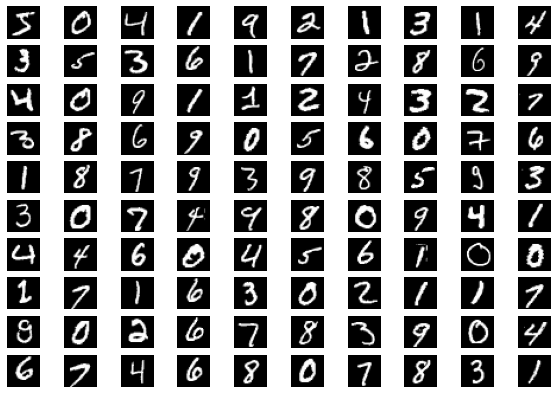

In [67]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 7))

for i in range(100):
    fig.add_subplot(10, 10, i+1)
    plt.imshow(data[0][0][i], 'gray')
    plt.axis('off')

plt.show()


In [60]:
def predict(network, input):
    output = input
    for layer in network:
        print(1)
        output = layer.forward(output)
        # print(output)
    return output

In [54]:
def train(network, X, Y, learning_rate=0.01, epochs=1000):
    err = []
    # X = np.reshape(X, (X.shape[0], X.shape[1], 1))

    for epoch in range(epochs):
        error = 0
        for x, y in zip(X, Y):
            output = predict(network, x)
            error += cross_entropy(y, output)
            output_grad = cross_entropy_prime(y, output)
            for layer in reversed(network):
                output_grad = layer.backward(output_grad, learning_rate)

        if epoch % 100 == 0:
            print('Epoch:', epoch, 'Error:', error)
            err.append(error)
    plt.plot(err)
    plt.show()

In [ ]:
cnn_layer = [CNN_generalized(1,16),Tanh(),Dense(16,1),Linear(),Softmax()]
train(cnn_layer, data[0][0], data[0][1])